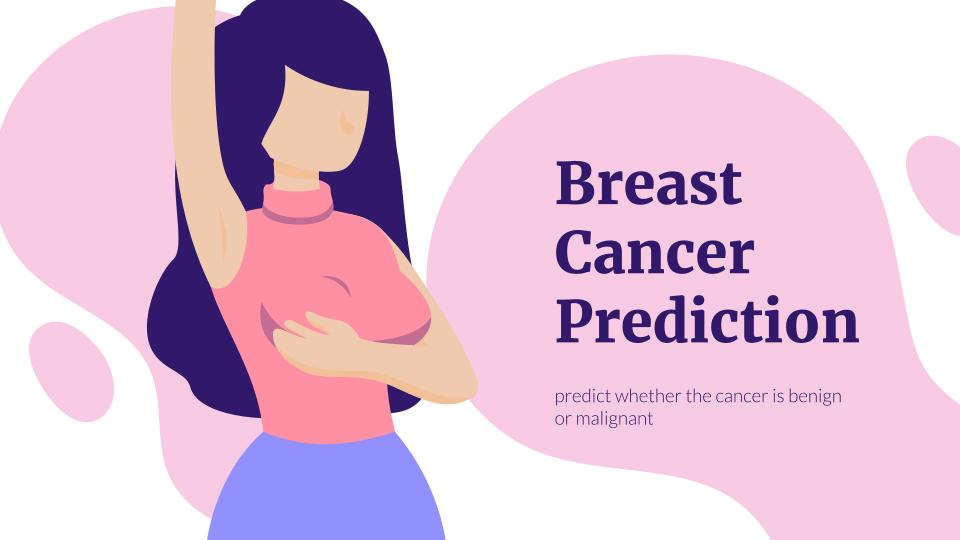

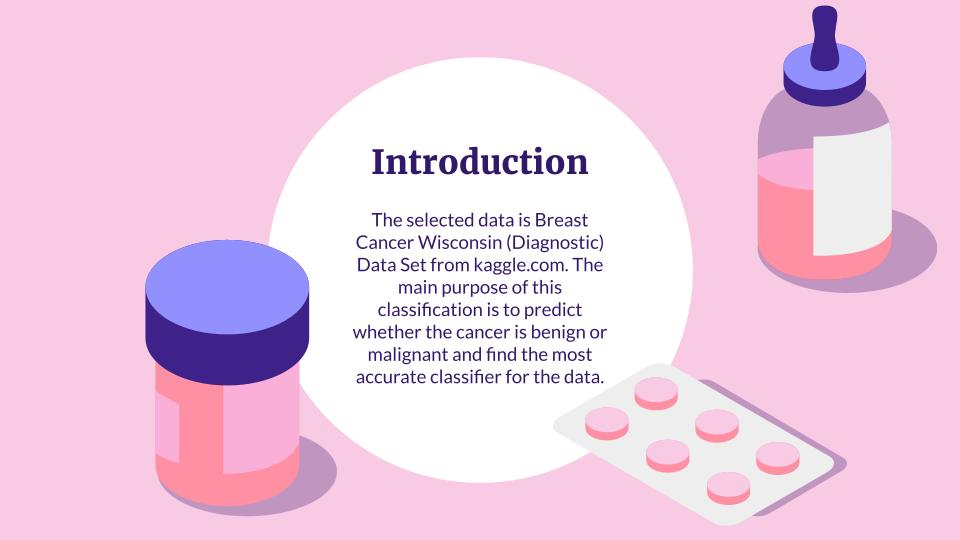

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Prepare data

In [2]:
import pandas as pd
cancer = pd.read_csv('data.csv')
cancer.drop('Unnamed: 32' , axis=1 , inplace=True)
pd.set_option('display.max_columns', None)
display(cancer)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


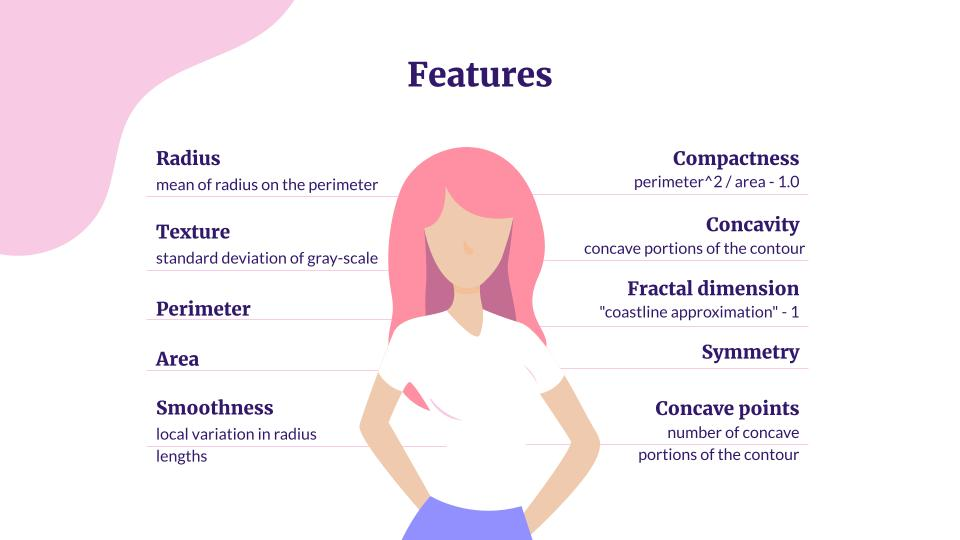

In [3]:
import numpy as np
Q1 = cancer.quantile(0.25)
Q3 = cancer.quantile(0.75)
IQR = Q3 - Q1
cleaned = cancer[~((cancer < (Q1 - 1.5 * IQR)) |(cancer > (Q3 + 1.5 * IQR))).any(axis=1)]
display(cleaned)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.013820,0.02254,0.010390,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
10,845636,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,0.3795,1.1870,2.466,40.51,0.004029,0.009269,0.01101,0.007591,0.01460,0.003042,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
13,846381,M,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,0.05338,0.4033,1.0780,2.903,36.58,0.009769,0.031260,0.05051,0.019920,0.02981,0.003002,16.84,27.66,112.00,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287
16,848406,M,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,0.05922,0.4727,1.2400,3.195,45.40,0.005718,0.011620,0.01998,0.011090,0.01410,0.002085,19.07,30.88,123.40,1138.0,0.1464,0.1871,0.2914,0.16090,0.3029,0.08216
19,8510426,B,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.11,19.26,99.70,711.2,0.1440,0.1773,0.2390,0.12880,0.2977,0.07259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,924632,B,12.88,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,0.05708,0.2116,1.3600,1.502,16.83,0.008412,0.021530,0.03898,0.007620,0.01695,0.002801,13.89,35.74,88.84,595.7,0.1227,0.1620,0.2439,0.06493,0.2372,0.07242
555,924934,B,10.29,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,0.1593,0.06127,0.2199,2.2390,1.437,14.46,0.012050,0.027360,0.04804,0.017210,0.01843,0.004938,10.84,34.91,69.57,357.6,0.1384,0.1710,0.2000,0.09127,0.2226,0.08283
558,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,0.06147,0.2254,1.1080,2.224,19.54,0.004242,0.046390,0.06578,0.016060,0.01638,0.004406,15.48,27.27,105.90,733.5,0.1026,0.3171,0.3662,0.11050,0.2258,0.08004
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,0.3645,1.4920,2.888,29.84,0.007256,0.026780,0.02071,0.016260,0.02080,0.005304,15.30,33.17,100.20,706.7,0.1241,0.2264,0.1326,0.10480,0.2250,0.08321


## Feature Engineering

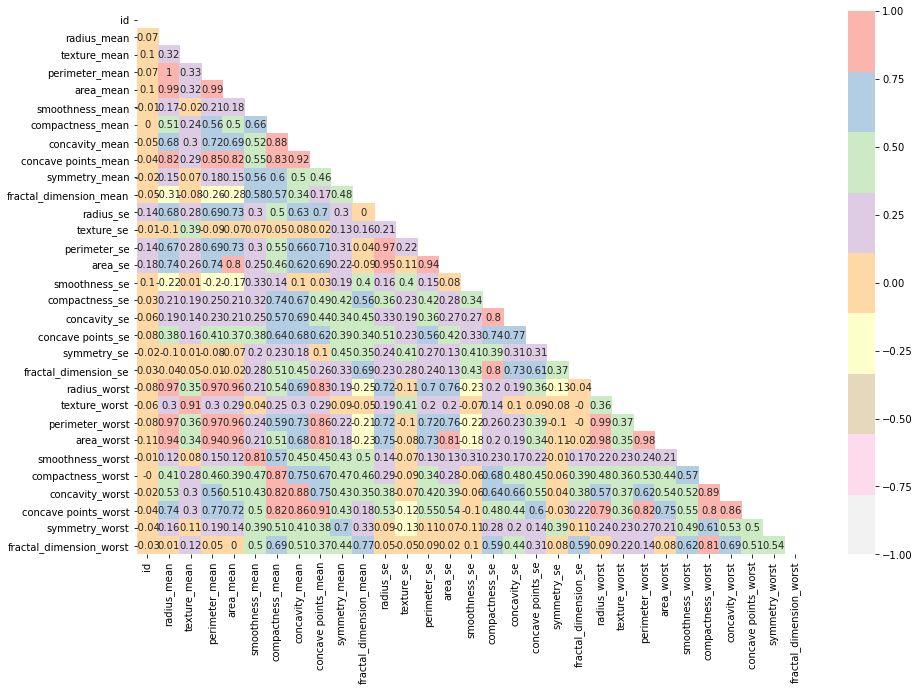

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
cancercorr = cancer.corr()
plt.figure(figsize=(15,10))
mask = np.triu(np.ones_like(cancercorr, dtype=np.bool))
heatmap = sns.heatmap(round(cancercorr,2), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Pastel1_r')

## Classification of raw data & cleaned data

In [5]:
#Raw data
from sklearn.model_selection import train_test_split
Xraw = cancer.iloc[:,3:]
yraw = cancer.iloc[:,1]
Xraw_train,Xraw_test,yraw_train,yraw_test = train_test_split(Xraw,yraw,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Xraw_train)
Xraw_train = scaler.transform(Xraw_train)
Xraw_test = scaler.transform(Xraw_test)

In [6]:
#Cleaned data
from sklearn.model_selection import train_test_split
Xcle = cleaned.iloc[:,3:]
ycle = cleaned.iloc[:,1]
Xcle_train,Xcle_test,ycle_train,ycle_test = train_test_split(Xcle,ycle,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Xcle_train)
Xcle_train = scaler.transform(Xcle_train)
Xcle_test = scaler.transform(Xcle_test)

### Logistic Regression

Accuracy percentage of Logistic Regression of Raw data: 96.49
Accuracy percentage of Logistic Regression of Cleaned data: 97.14


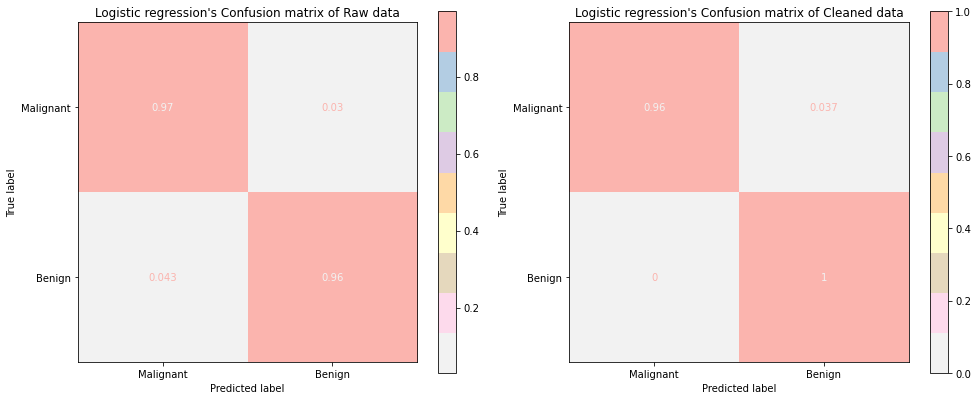

In [7]:
#Raw data
from sklearn.linear_model import LogisticRegression
LRraw = LogisticRegression()
LRraw = LRraw.fit(Xraw_train,yraw_train)
print("Accuracy percentage of Logistic Regression of Raw data:",round(LRraw.score(Xraw_test,yraw_test)*100,2))

#Cleaned data
LRcle = LogisticRegression()
LRcle = LRcle.fit(Xcle_train,ycle_train)
print("Accuracy percentage of Logistic Regression of Cleaned data:",round(LRcle.score(Xcle_test,ycle_test)*100,2))

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
fig, axes = plt.subplots(ncols=2,figsize=(14,6))
class_names = ["Malignant","Benign"]

#Raw data
titles1_options = [("Logistic regression's Confusion matrix of Raw data", 'true')]
for title, normalize in titles1_options:
    disp1 = plot_confusion_matrix(LRraw, Xraw_test, yraw_test,
                                 display_labels=class_names,
                                 normalize=normalize,
                                 cmap='Pastel1_r',
                                 ax=axes[0])
    disp1.ax_.set_title(title)

#Cleaned data
titles2_options = [("Logistic regression's Confusion matrix of Cleaned data", 'true')]
for title, normalize in titles2_options:
    disp2 = plot_confusion_matrix(LRcle, Xcle_test, ycle_test,
                                 display_labels=class_names,
                                 normalize=normalize,
                                 cmap='Pastel1_r',
                                 ax=axes[1])
    disp2.ax_.set_title(title)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Decision Tree Classifier

Accuracy percentage of Decision Tree of Raw data : 91.23
Accuracy percentage of Decision Tree of Cleaned data : 94.29


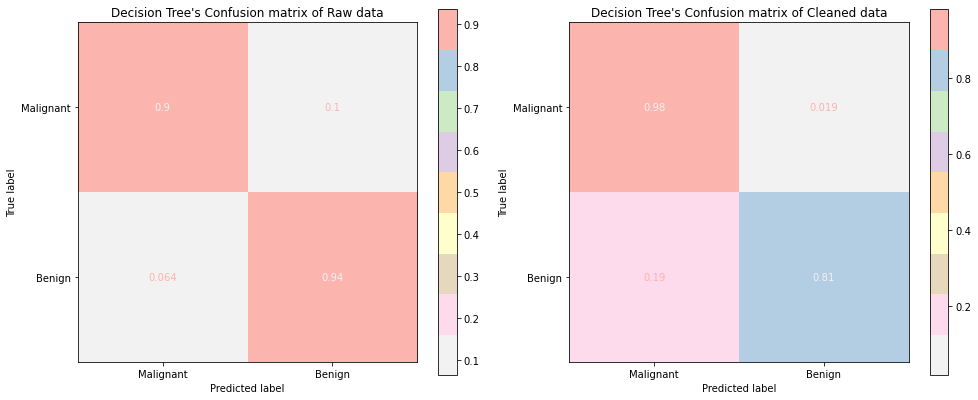

In [8]:
#Raw data
from sklearn.tree import DecisionTreeClassifier
DTraw = DecisionTreeClassifier()
DTraw = DTraw.fit(Xraw_train,yraw_train)
print("Accuracy percentage of Decision Tree of Raw data :",round(DTraw.score(Xraw_test,yraw_test)*100,2))

#Cleaned data
DTcle = DecisionTreeClassifier()
DTcle = DTcle.fit(Xcle_train,ycle_train)
print("Accuracy percentage of Decision Tree of Cleaned data :",round(DTcle.score(Xcle_test,ycle_test)*100,2))

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
fig, axes = plt.subplots(ncols=2,figsize=(14,6))
class_names = ["Malignant","Benign"]

#Raw data
titles1_options = [("Decision Tree's Confusion matrix of Raw data", 'true')]
for title, normalize in titles1_options:
    disp1 = plot_confusion_matrix(DTraw, Xraw_test, yraw_test,
                                 display_labels=class_names,
                                 normalize=normalize,
                                 cmap='Pastel1_r',
                                 ax=axes[0])
    disp1.ax_.set_title(title)

#Cleaned data
titles2_options = [("Decision Tree's Confusion matrix of Cleaned data", 'true')]
for title, normalize in titles2_options:
    disp2 = plot_confusion_matrix(DTcle, Xcle_test, ycle_test,
                                 display_labels=class_names,
                                 normalize=normalize,
                                 cmap='Pastel1_r',
                                 ax=axes[1])
    disp2.ax_.set_title(title)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### K-Nearest Neighbors

Accuracy percentage of K-Nearest Neighbors of Raw data : 95.61
Accuracy percentage of K-Nearest Neighbors of Cleaned data : 100.0


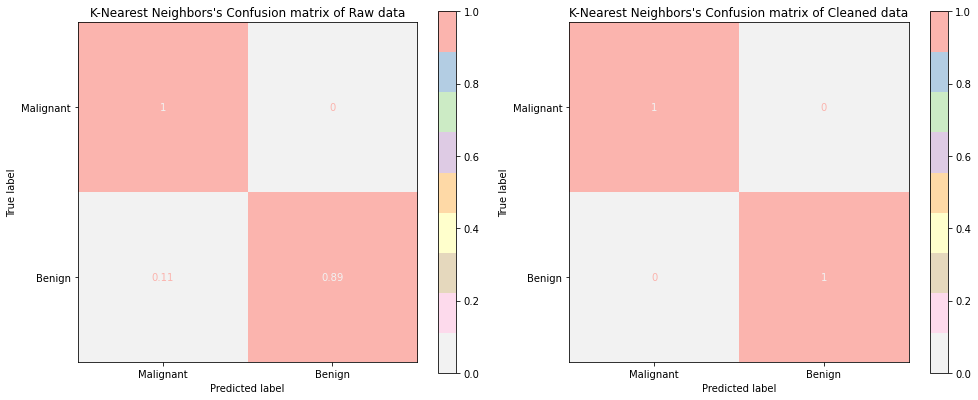

In [9]:
#Raw data
from sklearn.neighbors import KNeighborsClassifier
KNNraw = KNeighborsClassifier(n_neighbors=5)
KNNraw = KNNraw.fit(Xraw_train,yraw_train)
print("Accuracy percentage of K-Nearest Neighbors of Raw data :",round(KNNraw.score(Xraw_test,yraw_test)*100,2))

#Cleaned data
KNNcle = KNeighborsClassifier(n_neighbors=5)
KNNcle = KNNcle.fit(Xcle_train,ycle_train)
print("Accuracy percentage of K-Nearest Neighbors of Cleaned data :",round(KNNcle.score(Xcle_test,ycle_test)*100,2))

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
fig, axes = plt.subplots(ncols=2,figsize=(14,6))
class_names = ["Malignant","Benign"]

#Raw data
titles1_options = [("K-Nearest Neighbors's Confusion matrix of Raw data", 'true')]
for title, normalize in titles1_options:
    disp1 = plot_confusion_matrix(KNNraw, Xraw_test, yraw_test,
                                 display_labels=class_names,
                                 normalize=normalize,
                                 cmap='Pastel1_r',
                                 ax=axes[0])
    disp1.ax_.set_title(title)

#Cleaned data
titles2_options = [("K-Nearest Neighbors's Confusion matrix of Cleaned data", 'true')]
for title, normalize in titles2_options:
    disp2 = plot_confusion_matrix(KNNcle, Xcle_test, ycle_test,
                                 display_labels=class_names,
                                 normalize=normalize,
                                 cmap='Pastel1_r',
                                 ax=axes[1])
    disp2.ax_.set_title(title)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Support Vector Machine

Accuracy percentage of Support Vector Machine of Raw data : 98.25
Accuracy percentage of Support Vector Machine of Cleaned data : 100.0


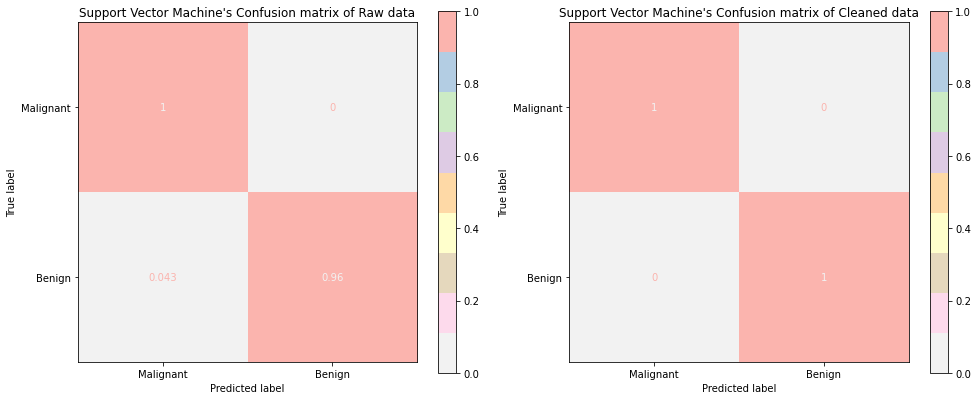

In [21]:
#Raw data
from sklearn import svm
SVMraw = svm.SVC()
SVMraw = SVMraw.fit(Xraw_train,yraw_train)
print("Accuracy percentage of Support Vector Machine of Raw data :",round(SVMraw.score(Xraw_test,yraw_test)*100,2))

#Cleaned data
SVMcle = svm.SVC()
SVMcle = SVMcle.fit(Xcle_train,ycle_train)
print("Accuracy percentage of Support Vector Machine of Cleaned data :",round(SVMcle.score(Xcle_test,ycle_test)*100,2))

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
fig, axes = plt.subplots(ncols=2,figsize=(14,6))
class_names = ["Malignant","Benign"]

#Raw data
titles1_options = [("Support Vector Machine's Confusion matrix of Raw data", 'true')]
for title, normalize in titles1_options:
    disp1 = plot_confusion_matrix(SVMraw, Xraw_test, yraw_test,
                                 display_labels=class_names,
                                 normalize=normalize,
                                 cmap='Pastel1_r',
                                 ax=axes[0])
    disp1.ax_.set_title(title)

#Cleaned data
titles2_options = [("Support Vector Machine's Confusion matrix of Cleaned data", 'true')]
for title, normalize in titles2_options:
    disp2 = plot_confusion_matrix(SVMcle, Xcle_test, ycle_test,
                                 display_labels=class_names,
                                 normalize=normalize,
                                 cmap='Pastel1_r',
                                 ax=axes[1])
    disp2.ax_.set_title(title)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Random Forest

Accuracy percentage of Random Forest of Raw data : 95.61
Accuracy percentage of Random Forest of Cleaned data : 97.14


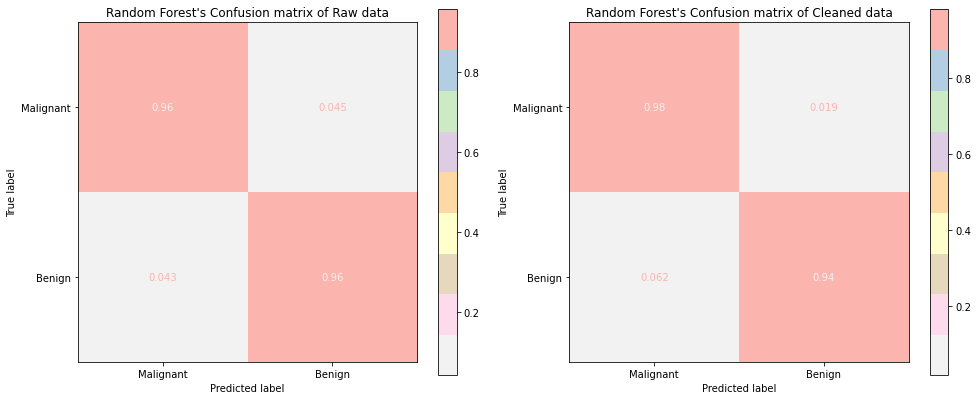

In [11]:
#Raw data
from sklearn.ensemble import RandomForestClassifier
RFraw = RandomForestClassifier(n_estimators=250)
RFraw = RFraw.fit(Xraw_train,yraw_train)
print("Accuracy percentage of Random Forest of Raw data :",round(RFraw.score(Xraw_test,yraw_test)*100,2))

#Cleaned data
RFcle = RandomForestClassifier(n_estimators=250)
RFcle = RFcle.fit(Xcle_train,ycle_train)
print("Accuracy percentage of Random Forest of Cleaned data :",round(RFcle.score(Xcle_test,ycle_test)*100,2))

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
fig, axes = plt.subplots(ncols=2,figsize=(14,6))
class_names = ["Malignant","Benign"]

#Raw data
titles1_options = [("Random Forest's Confusion matrix of Raw data", 'true')]
for title, normalize in titles1_options:
    disp1 = plot_confusion_matrix(RFraw, Xraw_test, yraw_test,
                                 display_labels=class_names,
                                 normalize=normalize,
                                 cmap='Pastel1_r',
                                 ax=axes[0])
    disp1.ax_.set_title(title)

#Cleaned data
titles2_options = [("Random Forest's Confusion matrix of Cleaned data", 'true')]
for title, normalize in titles2_options:
    disp2 = plot_confusion_matrix(RFcle, Xcle_test, ycle_test,
                                 display_labels=class_names,
                                 normalize=normalize,
                                 cmap='Pastel1_r',
                                 ax=axes[1])
    disp2.ax_.set_title(title)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Neural Network

Accuracy percentage of Neural Network of Raw data : 97.37
Accuracy percentage of Neural Network of Cleaned data : 92.86


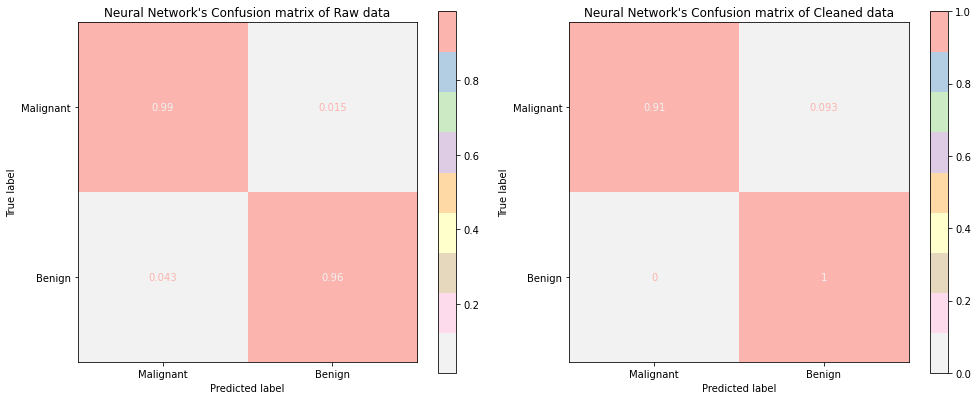

In [12]:
#Raw data
from sklearn.neural_network import MLPClassifier
NNraw = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
NNraw = NNraw.fit(Xraw_train,yraw_train)
print("Accuracy percentage of Neural Network of Raw data :",round(NNraw.score(Xraw_test,yraw_test)*100,2))

#Cleaned data
NNcle = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
NNcle = NNcle.fit(Xcle_train,ycle_train)
print("Accuracy percentage of Neural Network of Cleaned data :",round(NNcle.score(Xcle_test,ycle_test)*100,2))

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
fig, axes = plt.subplots(ncols=2,figsize=(14,6))
class_names = ["Malignant","Benign"]

#Raw data
titles1_options = [("Neural Network's Confusion matrix of Raw data", 'true')]
for title, normalize in titles1_options:
    disp1 = plot_confusion_matrix(NNraw, Xraw_test, yraw_test,
                                 display_labels=class_names,
                                 normalize=normalize,
                                 cmap='Pastel1_r',
                                 ax=axes[0])
    disp1.ax_.set_title(title)

#Cleaned data
titles2_options = [("Neural Network's Confusion matrix of Cleaned data", 'true')]
for title, normalize in titles2_options:
    disp2 = plot_confusion_matrix(NNcle, Xcle_test, ycle_test,
                                 display_labels=class_names,
                                 normalize=normalize,
                                 cmap='Pastel1_r',
                                 ax=axes[1])
    disp2.ax_.set_title(title)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

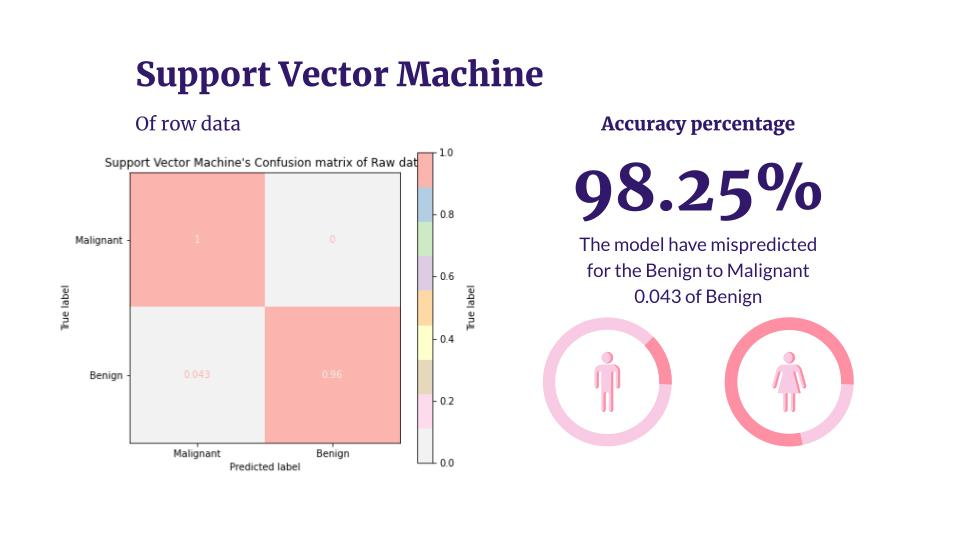

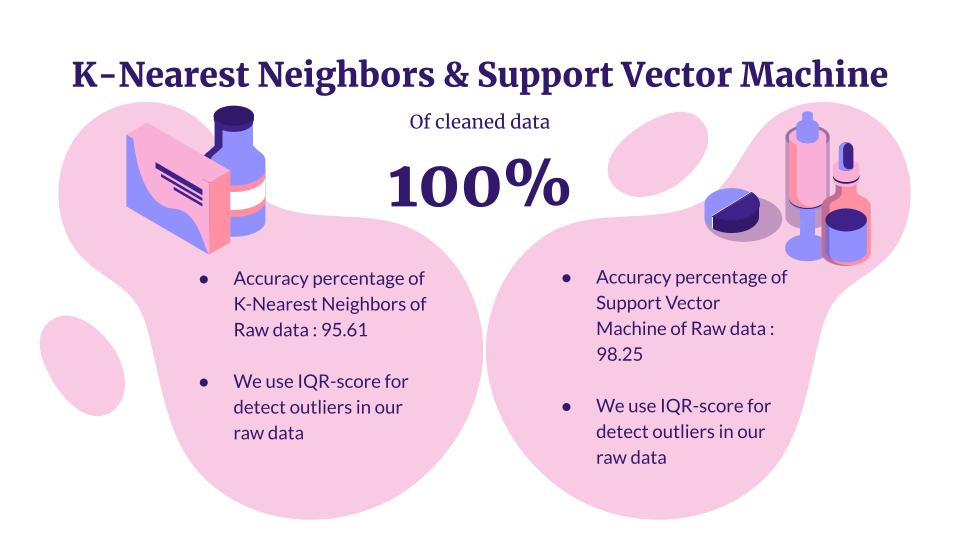